In [1]:
#importing libraries for image processing

import keras
import numpy as np
import random
from PIL import Image
import cv2
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
#importing libraries for building model

from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import losses

In [3]:
#Loads the images from training directory

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


In [4]:
#Pre-processing the input

def preprocess_images(images):
    images = np.array(images, dtype=np.float32)
    images = images.astype('float32')
    images /= 255
    return images


In [5]:
#Read the coordinates of the joints (labels)

def read_labels(label_file):
    df = pd.read_csv(label_file)
    numpy_matrix = df.as_matrix()
    return numpy_matrix

In [6]:
#Model

def build_model():
    model = Sequential()
    model.add(Conv2D(55, (55,96),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(27, (27,32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(13, (13,12), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25))    
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    return model
    

In [7]:
#directories for train_data and test_data

train_img_path = '/home/nani/Satellite_pose_Estimation/training_data/X_train'
validation_img_path = '/home/nani/Satellite_pose_Estimation/validation_data/X_validation'
test_img_path = '/home/nani/Satellite_pose_Estimation/test_data/X_test'

train_lbl_path = '/home/nani/Satellite_pose_Estimation/training_data/y_train/y_train.csv'
validation_lbl_path = '/home/nani/Satellite_pose_Estimation/validation_data/y_validation/y_validation.csv'
test_lbl_path = '/home/nani/Satellite_pose_Estimation/test_data/y_test/y_test.csv'

input_shape = (256, 256, 3)

## input image dimensions
img_rows, img_cols = 256, 256


In [8]:
#Read training and testing data

#X
train_images = load_images_from_folder(train_img_path)
validation_images = load_images_from_folder(validation_img_path)
test_images  = load_images_from_folder(test_img_path)

#y
y_train = read_labels(train_lbl_path)
y_validation = read_labels(validation_lbl_path)
y_test = read_labels(test_lbl_path)



/home/nani/anaconda3/envs/satellite_pose_estimation/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [9]:
#Preprocessing the input data

x_train = preprocess_images(train_images)
x_validation = preprocess_images(validation_images) 
x_test = preprocess_images(test_images)

In [10]:
#Build model
model = build_model()
model.compile(loss=keras.losses.mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
#Fit the data
history = model.fit(x_train, y_train,
          batch_size=10,
          epochs=10,
          verbose=1,
          validation_data=(x_validation, y_validation))



Instructions for updating:
Use tf.cast instead.
Train on 80 samples, validate on 10 samples
Epoch 1/10
80/80 [==============================] - 189s 2s/step - loss: 97619.5122 - acc: 0.0750 - val_loss: 17131.7930 - val_acc: 0.2000
Epoch 2/10
80/80 [==============================] - 183s 2s/step - loss: 17430.4893 - acc: 0.0875 - val_loss: 17093.0156 - val_acc: 0.2000
Epoch 3/10
80/80 [==============================] - 183s 2s/step - loss: 17311.2886 - acc: 0.1125 - val_loss: 16774.9766 - val_acc: 0.0000e+00
Epoch 4/10
80/80 [==============================] - 184s 2s/step - loss: 16350.3839 - acc: 0.0750 - val_loss: 14098.5215 - val_acc: 0.0000e+00
Epoch 5/10
80/80 [==============================] - 186s 2s/step - loss: 12312.5363 - acc: 0.0500 - val_loss: 8692.7793 - val_acc: 0.2000
Epoch 6/10
80/80 [==============================] - 183s 2s/step - loss: 6479.2479 - acc: 0.1375 - val_loss: 5227.1904 - val_acc: 0.2000
Epoch 7/10
80/80 [==============================] - 184s 2s/step - lo

In [12]:
#Evaluate test_Data
model.evaluate(x_test, y_test)

10/10 [==============================] - 7s 725ms/step


[500.95465087890625, 0.699999988079071]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


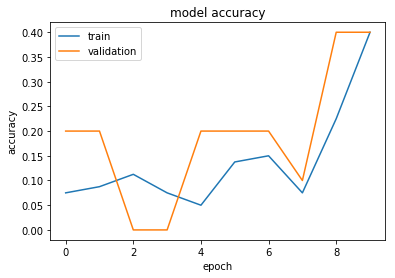

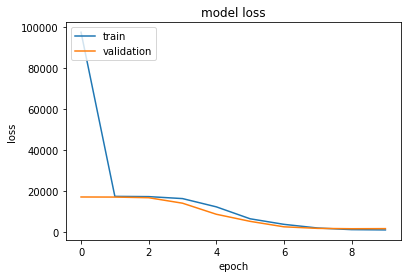

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()